MONTE CARLO ALGORITHM DEMONSTRATIONS

1. Estimating π using random points:


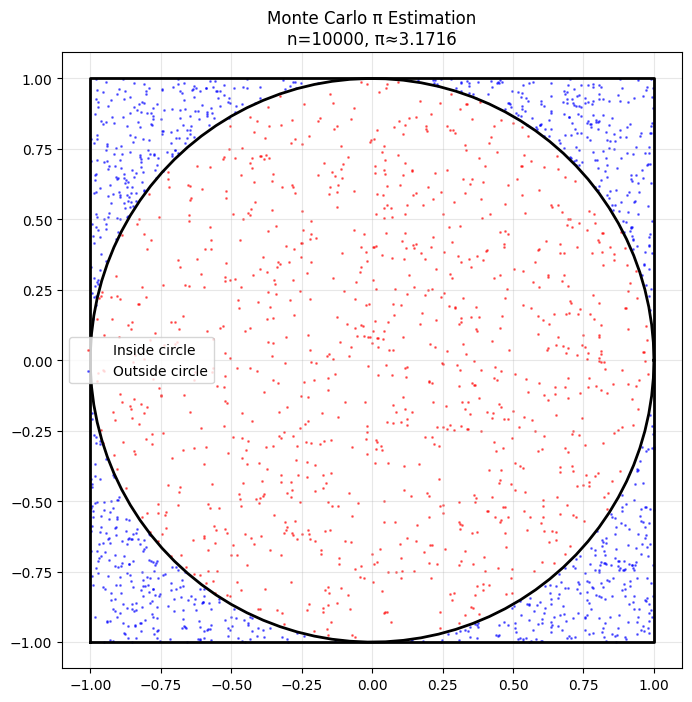

   Estimated π: 3.171600
   Actual π:    3.141593
   Error:       0.030007

2. Convergence Analysis:
Demonstrating Monte Carlo Convergence for π Estimation
   Samples |   Estimate |      Error |    Error %
-------------------------------------------------------
        10 |   2.800000 |   0.341593 |     10.87%
        50 |   3.440000 |   0.298407 |      9.50%
       100 |   3.120000 |   0.021593 |      0.69%
       500 |   3.040000 |   0.101593 |      3.23%
      1000 |   3.220000 |   0.078407 |      2.50%
      5000 |   3.164800 |   0.023207 |      0.74%
     10000 |   3.147600 |   0.006007 |      0.19%
     50000 |   3.149120 |   0.007527 |      0.24%
    100000 |   3.142440 |   0.000847 |      0.03%


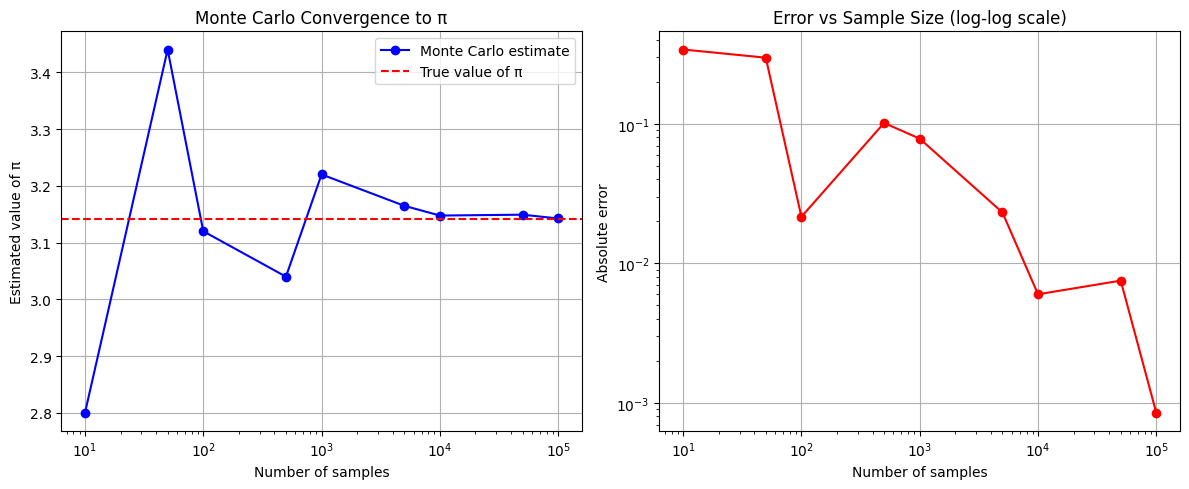


3. Monte Carlo Integration:
   Integrating f(x) = x² from 0 to 1
   Monte Carlo result: 0.333080
   Analytical result:  0.333333
   Error:              0.000253

4. Buffon's Needle Problem:
   Estimated π: 1.564970
   Error:       1.576623

5. Option Pricing Example:
   European Call Option:
   - Current price: $100
   - Strike price: $110
   - Risk-free rate: 5%
   - Volatility: 20%
   - Time to maturity: 1 year
   Option price: $6.04


In [1]:
"""
Monte Carlo Algorithm Explanation and Demonstration
==================================================

The Monte Carlo method is a computational algorithm that uses random sampling
to solve problems that might be deterministic in principle. It's particularly
useful for:
- Numerical integration
- Optimization problems
- Risk analysis
- Physics simulations
- Financial modeling

The key idea: Use randomness to solve problems that might be difficult to
solve deterministically.
"""

import random
import math
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple

def estimate_pi_monte_carlo(n_samples: int, visualize: bool = False) -> float:
    """
    Estimate π using Monte Carlo method by randomly sampling points
    in a square and checking if they fall within an inscribed circle.
    
    Theory: 
    - Square has area = 4 (side length = 2)
    - Circle has area = π * r² = π (radius = 1)
    - Ratio of points in circle to total points ≈ π/4
    - Therefore, π ≈ 4 * (points in circle / total points)
    """
    points_in_circle = 0
    x_inside, y_inside = [], []
    x_outside, y_outside = [], []
    
    for _ in range(n_samples):
        # Generate random point in square [-1, 1] x [-1, 1]
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        
        # Check if point is inside unit circle (x² + y² ≤ 1)
        if x**2 + y**2 <= 1:
            points_in_circle += 1
            if visualize and len(x_inside) < 1000:  # Limit points for visualization
                x_inside.append(x)
                y_inside.append(y)
        else:
            if visualize and len(x_outside) < 1000:
                x_outside.append(x)
                y_outside.append(y)
    
    # Estimate π
    pi_estimate = 4 * points_in_circle / n_samples
    
    if visualize:
        plt.figure(figsize=(8, 8))
        plt.scatter(x_inside, y_inside, c='red', s=1, alpha=0.5, label='Inside circle')
        plt.scatter(x_outside, y_outside, c='blue', s=1, alpha=0.5, label='Outside circle')
        
        # Draw the circle
        theta = np.linspace(0, 2*np.pi, 100)
        plt.plot(np.cos(theta), np.sin(theta), 'black', linewidth=2)
        
        # Draw the square
        plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], 'black', linewidth=2)
        
        plt.axis('equal')
        plt.title(f'Monte Carlo π Estimation\nn={n_samples}, π≈{pi_estimate:.4f}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    return pi_estimate

def monte_carlo_integration(func, a: float, b: float, n_samples: int) -> float:
    """
    Estimate the integral of a function using Monte Carlo method.
    
    ∫[a,b] f(x)dx ≈ (b-a) * (1/n) * Σf(xi) where xi are random samples
    """
    total = 0
    for _ in range(n_samples):
        x = random.uniform(a, b)
        total += func(x)
    
    return (b - a) * total / n_samples

def demonstrate_convergence():
    """Show how Monte Carlo estimates improve with more samples."""
    sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
    pi_estimates = []
    errors = []
    
    print("Demonstrating Monte Carlo Convergence for π Estimation")
    print("=" * 55)
    print(f"{'Samples':>10} | {'Estimate':>10} | {'Error':>10} | {'Error %':>10}")
    print("-" * 55)
    
    for n in sample_sizes:
        estimate = estimate_pi_monte_carlo(n)
        error = abs(estimate - math.pi)
        error_percent = (error / math.pi) * 100
        
        pi_estimates.append(estimate)
        errors.append(error)
        
        print(f"{n:>10} | {estimate:>10.6f} | {error:>10.6f} | {error_percent:>9.2f}%")
    
    # Plot convergence
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(sample_sizes, pi_estimates, 'b-o', label='Monte Carlo estimate')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True value of π')
    plt.xlabel('Number of samples')
    plt.ylabel('Estimated value of π')
    plt.title('Monte Carlo Convergence to π')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.loglog(sample_sizes, errors, 'r-o')
    plt.xlabel('Number of samples')
    plt.ylabel('Absolute error')
    plt.title('Error vs Sample Size (log-log scale)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def buffon_needle_problem(n_needles: int, needle_length: float = 1.0, line_spacing: float = 2.0) -> float:
    """
    Buffon's Needle Problem: Another classic Monte Carlo example.
    Drop needles randomly on a floor with parallel lines and estimate π.
    
    P(needle crosses line) = 2L/(πD) where L=needle length, D=line spacing
    Therefore: π = 2L/(P*D)
    """
    crossings = 0
    
    for _ in range(n_needles):
        # Random center position between lines
        center_y = random.uniform(0, line_spacing/2)
        # Random angle
        angle = random.uniform(0, math.pi)
        
        # Check if needle crosses a line
        half_length = needle_length / 2
        y_offset = half_length * math.sin(angle)
        
        if center_y - y_offset <= 0 or center_y + y_offset >= line_spacing/2:
            crossings += 1
    
    probability = crossings / n_needles
    pi_estimate = (2 * needle_length) / (probability * line_spacing) if probability > 0 else 0
    
    return pi_estimate

def monte_carlo_stock_option(S0: float, K: float, r: float, sigma: float, T: float, n_simulations: int) -> float:
    """
    Price a European call option using Monte Carlo simulation.
    
    Parameters:
    S0: Current stock price
    K: Strike price
    r: Risk-free rate
    sigma: Volatility
    T: Time to maturity
    n_simulations: Number of Monte Carlo simulations
    """
    payoffs = []
    
    for _ in range(n_simulations):
        # Generate random price path using geometric Brownian motion
        Z = random.gauss(0, 1)  # Standard normal random variable
        ST = S0 * math.exp((r - 0.5 * sigma**2) * T + sigma * math.sqrt(T) * Z)
        
        # Calculate payoff
        payoff = max(ST - K, 0)
        payoffs.append(payoff)
    
    # Option price is discounted expected payoff
    option_price = math.exp(-r * T) * sum(payoffs) / n_simulations
    return option_price

def main():
    """Run various Monte Carlo demonstrations."""
    print("MONTE CARLO ALGORITHM DEMONSTRATIONS")
    print("=" * 40)
    
    # 1. Basic π estimation with visualization
    print("\n1. Estimating π using random points:")
    pi_estimate = estimate_pi_monte_carlo(10000, visualize=True)
    print(f"   Estimated π: {pi_estimate:.6f}")
    print(f"   Actual π:    {math.pi:.6f}")
    print(f"   Error:       {abs(pi_estimate - math.pi):.6f}")
    
    # 2. Convergence demonstration
    print("\n2. Convergence Analysis:")
    demonstrate_convergence()
    
    # 3. Integration example
    print("\n3. Monte Carlo Integration:")
    print("   Integrating f(x) = x² from 0 to 1")
    # Analytical result: ∫x²dx from 0 to 1 = 1/3
    result = monte_carlo_integration(lambda x: x**2, 0, 1, 100000)
    print(f"   Monte Carlo result: {result:.6f}")
    print(f"   Analytical result:  {1/3:.6f}")
    print(f"   Error:              {abs(result - 1/3):.6f}")
    
    # 4. Buffon's Needle
    print("\n4. Buffon's Needle Problem:")
    pi_buffon = buffon_needle_problem(100000)
    print(f"   Estimated π: {pi_buffon:.6f}")
    print(f"   Error:       {abs(pi_buffon - math.pi):.6f}")
    
    # 5. Financial application
    print("\n5. Option Pricing Example:")
    print("   European Call Option:")
    print("   - Current price: $100")
    print("   - Strike price: $110")
    print("   - Risk-free rate: 5%")
    print("   - Volatility: 20%")
    print("   - Time to maturity: 1 year")
    option_price = monte_carlo_stock_option(100, 110, 0.05, 0.20, 1.0, 100000)
    print(f"   Option price: ${option_price:.2f}")

if __name__ == "__main__":
    main()